In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datos/Entrada_limpia.csv")

anomalias = pd.read_csv("Datos/anomalias.csv", header=None)
anomalias.columns= ['score']

df['scores'] = anomalias['score']

In [3]:
df = df.set_index('fecha')
df.head(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std,CurvaCola,scores
fecha,,,,,,,,,,,,,,,,,,,,,
2021-02-10 16:24:00,7.80,6.454529,12.314780,15.73373,78.541285,144.23,52.8,69.99834,39.99929,24.0,...,68.861110,68.861110,68.861110,5.68,0.209343,0.091988,0.215115,0.082579,0,0.5
2021-02-10 16:34:00,10.72,7.315059,7.544955,10.17235,77.805810,144.24,49.0,79.99815,39.99929,27.6,...,72.978775,72.978775,72.978775,5.60,0.040575,0.093870,0.329550,0.836433,0,0.5


<AxesSubplot:>

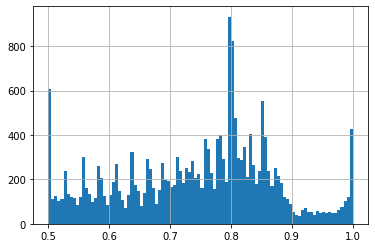

In [4]:
df['scores'].hist(bins=100)

<AxesSubplot:>

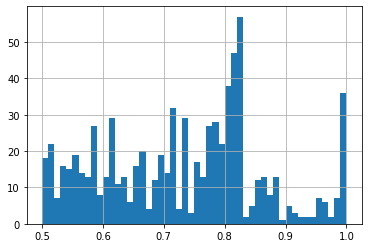

In [5]:
df[df['CurvaCola']==1]['scores'].hist(bins=50)

<AxesSubplot:>

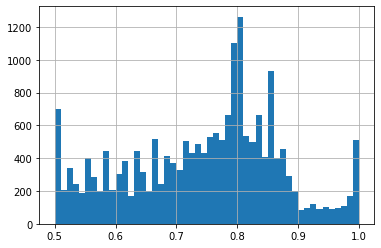

In [6]:
df[df['CurvaCola']==0]['scores'].hist(bins=50)

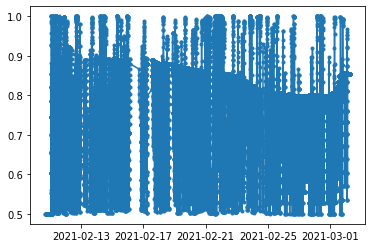

In [7]:
df.index = pd.to_datetime(df.index)
plt.plot(df.index, df.scores,'.-')

In [8]:
df['Y_pred'] = df['scores'].map(lambda x: 1 if x>0.9 else 0)

In [9]:
df.loc[:,['CurvaCola','scores','Y_pred']].to_csv('HTM_completo.csv')